In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
data_frame = pd.read_csv('./waga.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


Zbiór danych waga.csv zawiera dane o 78 osobach, które były na różnych dietach przez 6 tygodni.
1. Person - informacja o osobie (dane jakościowe),
2. Gender - płeć (dane jakościowe),
3. Age - wiek (dane ilościowe),
4. Height - wzrost (dane ilościowe),
5. Pre.weight - waga przed dietą (dane ilościowe),
6. Diet - inofmracja o tym, na jakiej diecie była osoba badana (dane jakościowe),
7. weight6weeks - waga po diecie (dane ilościowe).

Dane jakościowe zostały zakodowane za pomocą liczb.

In [4]:
data_frame.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


In [10]:
data_frame.isnull().sum()

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

Sprawdzając czy w zbiorze występują obserwacje brakujące za pomocą funkcji `isnull` otrzymaliśmy informację, że w żadnej z kolumn nie ma obserwacji brakujących, jednak już na wcześniejszemy podglądzie można było zauważyć, że w dwóch pierwszych wierszach brakuje informacji na temat płci. Być może to wynika z typu danych w tej kolumnie. 

In [6]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Person,78.0,39.500000,22.660538,1.0,20.25,39.50,58.750,78.0
Age,78.0,39.153846,9.815277,16.0,32.25,39.00,46.750,60.0
Height,78.0,170.820513,11.276621,141.0,164.25,169.50,174.750,201.0
pre.weight,78.0,72.525641,8.723344,58.0,66.00,72.00,78.000,103.0
Diet,78.0,2.038462,0.812920,1.0,1.00,2.00,3.000,3.0
weight6weeks,78.0,68.680769,8.924504,53.0,61.85,68.95,73.825,103.0


Z podumowania `describe` tabeli możemy wywnioskować:
- średni wiek osoby badanej to ok. 39 lat, najmłodsza osoba miała 16 lat, a najstarsza 60,
- średni wzrost osoby badanej to ok. 171, najniższy wzrost to 141, a najwyższy 201,
- średnia waga przed dietą to ok. 72,5, najniższa waga przed dietą to 58, a najwyższa waga przed dieta to 103.
- średnia waga po diecie to ok. 68,5, najniższa waga po diecie to 53, a najwyższa waga po diecie to 103.

Można wysunąć ogólny wniosek, że diety okazały skuteczne, średnia waga po jest niższa niż średnia waga przed dietą.

### Płeć osób badanych

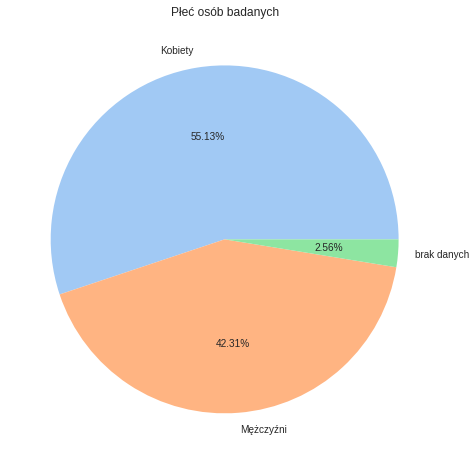

In [97]:
gender = data_frame['gender'].value_counts()
colors = sns.color_palette('pastel')[0:3]
plt.pie(gender, autopct='%1.2f%%', labels=['Kobiety', 'Mężczyźni', 'brak danych'], colors=colors)
plt.title('Płeć osób badanych')
plt.show()

In [87]:
gender

0    43
1    33
      2
Name: gender, dtype: int64

Większość osób na diecie to kobiety, bbyło ich 43. Mężczyzn było 33, a dla dwóch osób nie posiadamy danych co do ich płci.

### Wiek osób badanych

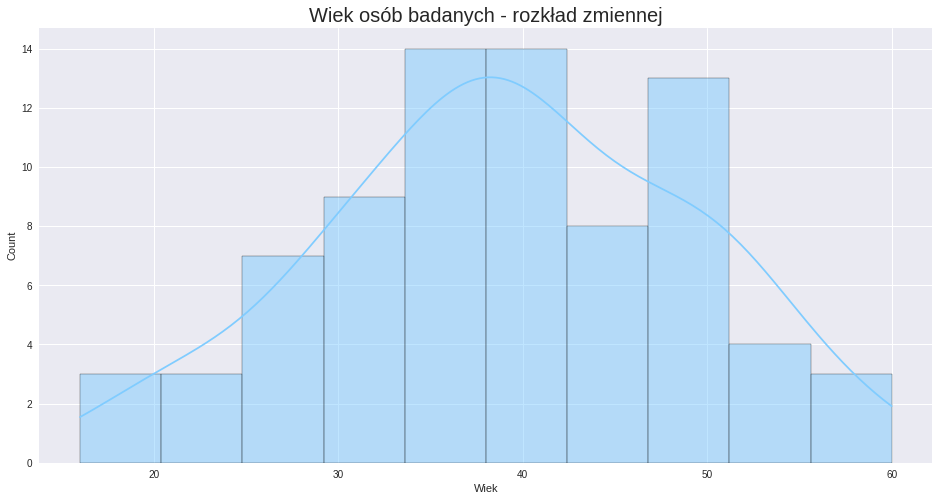

In [101]:
sns.histplot(x='Age',data=data_frame,bins=10,kde=True, color='#80ccff' )
plt.xlabel('Wiek')
plt.title('Wiek osób badanych - rozkład zmiennej', size=20)
plt.show()

In [91]:
data_frame['Age'].describe()

count    78.000000
mean     39.153846
std       9.815277
min      16.000000
25%      32.250000
50%      39.000000
75%      46.750000
max      60.000000
Name: Age, dtype: float64

Najwięcej osób badanych było w przedziale wiekowym 35-45 lat. Najmłodsza badana osoba miała 16 lat, a najstarsza 60. Średni wiek osoby badanej to 39 lat.

### Wzrost osób badanych

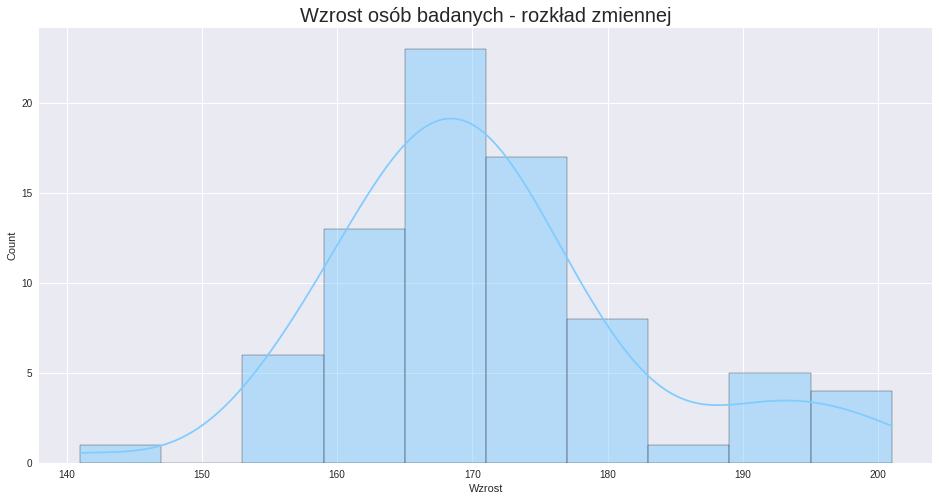

In [11]:
sns.histplot(x='Height',data=data_frame, bins=10,kde=True, color='#80ccff')
plt.xlabel('Wzrost')
plt.title('Wzrost osób badanych - rozkład zmiennej', size=20)
plt.show()

In [119]:
data_frame['Height'].describe()

count     78.000000
mean     170.820513
std       11.276621
min      141.000000
25%      164.250000
50%      169.500000
75%      174.750000
max      201.000000
Name: Height, dtype: float64

Średni wzrost osoby badanej to około 171, na wykresie widać też, że najczęstszy wzorst osoby jest z przedziału ok 165-171. Najniższa badana oosoba miała wzrost wynoszący 141, a najwyższa 201.



### Waga przed i waga po diecie

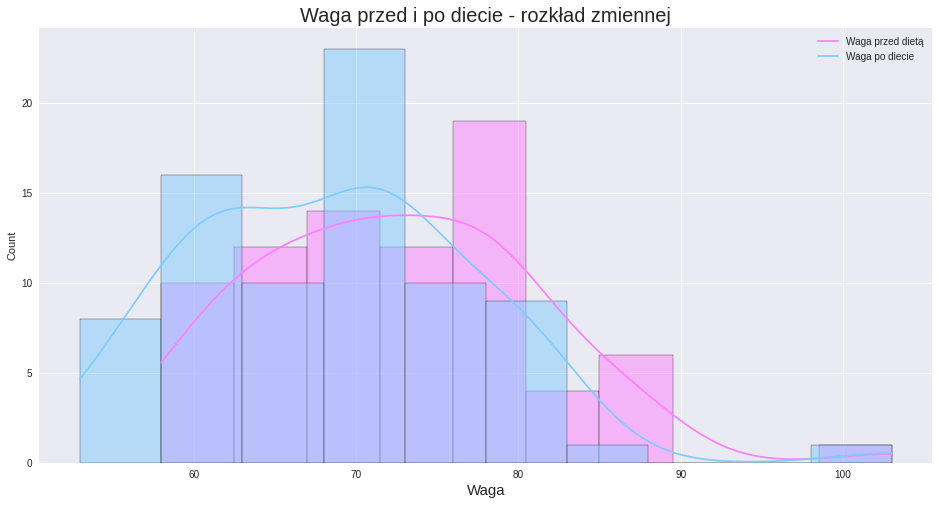

In [127]:
sns.histplot(x='pre.weight',data=data_frame,bins=10,kde=True, color='#ff80ff' )
sns.histplot(x='weight6weeks',data=data_frame,bins=10,kde=True, color='#80ccff' )
plt.legend(['Waga przed dietą', 'Waga po diecie'])
plt.xlabel('Waga', size=15)
plt.title('Waga przed i po diecie - rozkład zmiennej', size=20)
plt.show()

In [68]:
data_frame[['pre.weight','weight6weeks']].describe()

,pre.weight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


Patrząc na powyższy wykres oraz podsumowania dla kolumn zawierających dane dot. wagi przed dietą oraz po diecie możemy wywnioskować, że diety okazały się skuteczne. Rozkład danych dot. wagi po diecie jest przesunięty w lewo w stosunku do rozkładu danych dot. wagi przed dietą - czyli wartości dla wagi po diecie mają niższe wartości. 
<br>Przed dietą najwięcej wartości dla wagi było w przedziale ok. 76-80. Średnia waga przed dietą to 72,5. Najniższa waga przed dietą to 58, a najwyższa waga przed dietą to 103. <br>
Po diecie najwięcej wartości dla wagi było w przedziale 67-71, średnia waga po diecie to 68,6 - co również potwierdza, że diety były skuteczne. Najniższa waga po diecie to 53, nie zmieniła się za to waga najwyższa, nadal wynosi 103.

### Rodzaj diety

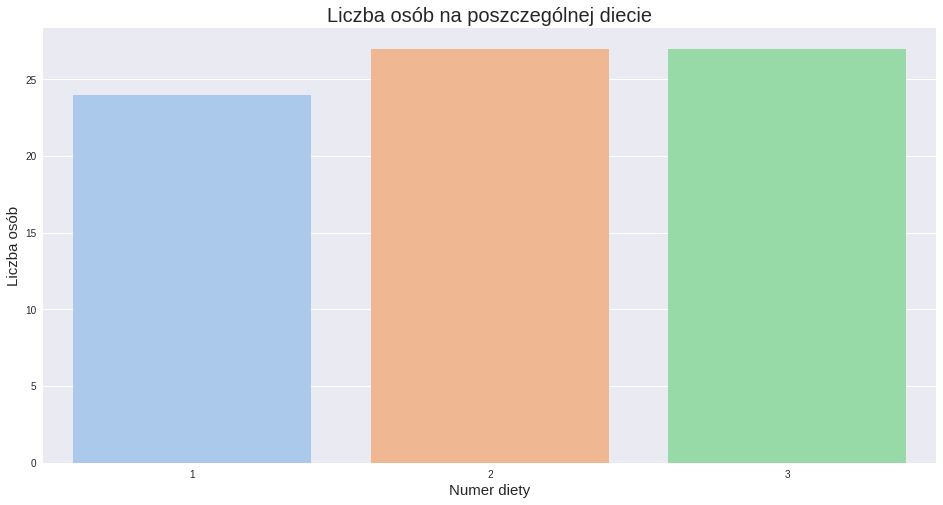

In [25]:
diets = data_frame['Diet'].value_counts()
diets = diets.reset_index()
sns.barplot(data=diets, x='index', y='Diet', palette ='pastel')
plt.xlabel('Numer diety', size =15)
plt.ylabel('Liczba osób', size=15)
plt.title('Liczba osób na poszczególnej diecie', size=20)
plt.show()

In [26]:
diets

,index,Diet
0,2,27
1,3,27
2,1,24


Z powyższego wykresu oraz tabeli podliczającej ilośc osób na danej diecie dowiadujemy się, że na diecie numer 2 i 3 było 27 osób, na diecie nr 1 były 24 osoby.

### Skuteczność diety

Aby lepiej przeanalizować skuteczność diet dodałam kolumnę, która oblicza różnicę między wagą po diecie, a wagą przed dietą.

In [44]:
data_frame['difference'] = data_frame['weight6weeks'] - data_frame['pre.weight'] 

In [45]:
data_frame

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,difference
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,-3.8
3,2,0,46,192,60,1,54.0,-6.0
4,3,0,55,170,64,1,63.3,-0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,-2.8
74,75,1,49,177,84,3,79.9,-4.1
75,76,1,28,164,85,3,79.7,-5.3
76,77,1,40,167,87,3,77.8,-9.2


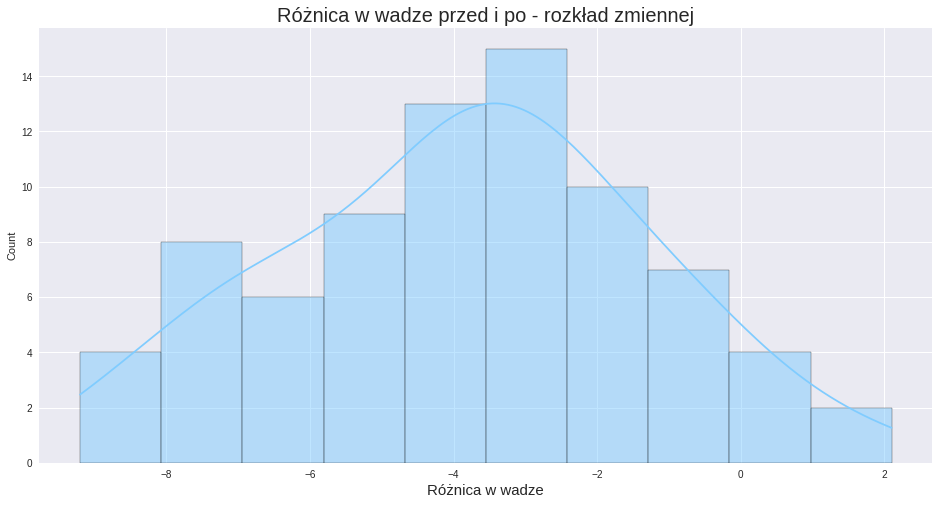

In [130]:
sns.histplot(x='difference',data=data_frame,bins=10,kde=True, color='#80ccff' )
plt.xlabel('Różnica w wadze', size=15)
plt.title('Różnica w wadze przed i po - rozkład zmiennej', size=20)
plt.show()

In [59]:
data_frame['difference'].describe()

count    78.000000
mean     -3.844872
std       2.551478
min      -9.200000
25%      -5.550000
50%      -3.600000
75%      -2.000000
max       2.100000
Name: difference, dtype: float64

Wywołanie funkcji `describe` na nowej kolumnie oraz histogram dla tej zmiennej mówi nam, że średnio osoba na diecie straciła na wadze 3,84, wartości zbliżonych do tej liczby było też najwięcej. Najwięszky spadek wagi to 9,2. Nie wszystkim udało się schudnąć, a z pośród osób, które w trakcie diety przybrały na wadze, największy przyrost to 2,1.

In [47]:
def result(różnica):
    if różnica == 0:
        return "brak zmian"
    elif różnica > 0:
        return "przybranie na wadze"
    return "utrata wagi"

In [50]:
data_frame['result'] = data_frame['difference'].apply(result)

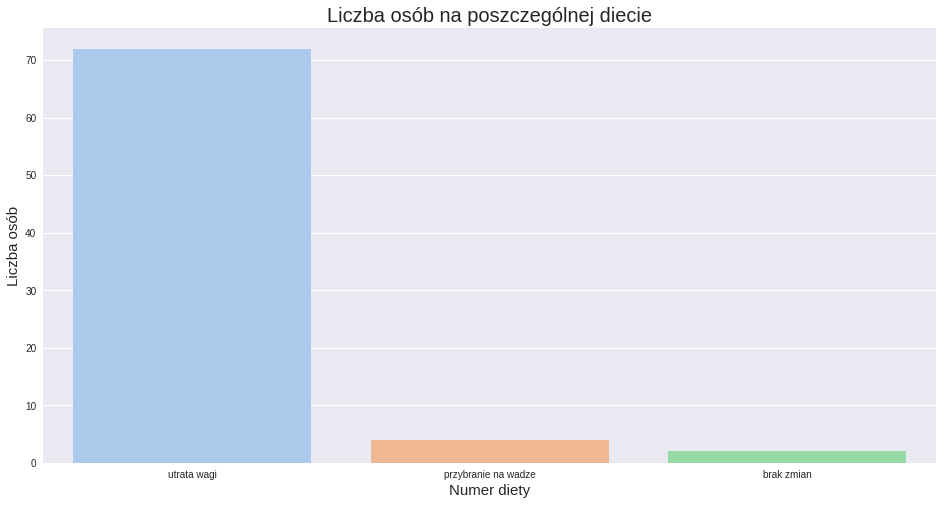

In [52]:
results = data_frame['result'].value_counts()
results = results.reset_index()
sns.barplot(data=results, x='index', y='result', palette ='pastel')
plt.xlabel('Numer diety', size =15)
plt.ylabel('Liczba osób', size=15)
plt.title('Liczba osób na poszczególnej diecie', size=20)
plt.show()

In [53]:
results

,index,result
0,utrata wagi,72
1,przybranie na wadze,4
2,brak zmian,2


Prawie wszystkie osoby (72) odnotowały spadek wagi w stosunku do wagi sprzed diety. 4 osoby przybrały na wadze, a 2 nie odnotowały żadnych zmian wagi.

#### Zadanie 6a
Średni wzrost mężczyzn w Polsce, to 177,3 a kobiet 164,6. Zweryfikuj hipotezę, że średni wzrost osób badanych jest taki sam jak Polaków. 

Hipoteza zerowa: Wzrost osób badanych jest taki sam jak wzrost Polaków.<br>
Hipoteza alterantywna: Wzrost badanych osób jest różny niż wzrost Polaków.<br>
Aby wybrac odpowiedni test by to sprawdzić zaczniemy od sprawdzenia czy dane z kolumny zawierającej dane dot, wzrostu pochodzą z rozkładu normalnego.

Jako pierwszy wykorzystamy test Shapiro-Wilk z poziomem istotności 0.05 i postawimy tezy:
Hipoteza zerowa: Dane są z rozkładu normalnego.
Hipoteza alterantywna: Dane nie są z rozkładu normalnego.

In [17]:
data = data_frame['Height']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Prawdopodobnie jest to rozkład normalny")
else:
    print("Prawdopodobnie nie jest to rozkład normalny")
print('statystyka:', stat, 'p-value:', p)

Prawdopodobnie nie jest to rozkład normalny
statystyka: 0.9432562589645386 p-value: 0.0016975137405097485


Przeprowadzony test wykazał nam niską wartośc p-value. Jest ona poniżej naszego przyjętego poziomu istotności, a oznacza to, że odrzucamy hipotezę zerową, która zakładała, że dane pochodzą z rozkładu normalnego. Według testu nie pochodzą one z rozkładu normalnego.<br>
Jednak na jednym teście nie skończymy testowania, sprawdzimy jeszcze inne możliwości m.in. wykres qqplot.

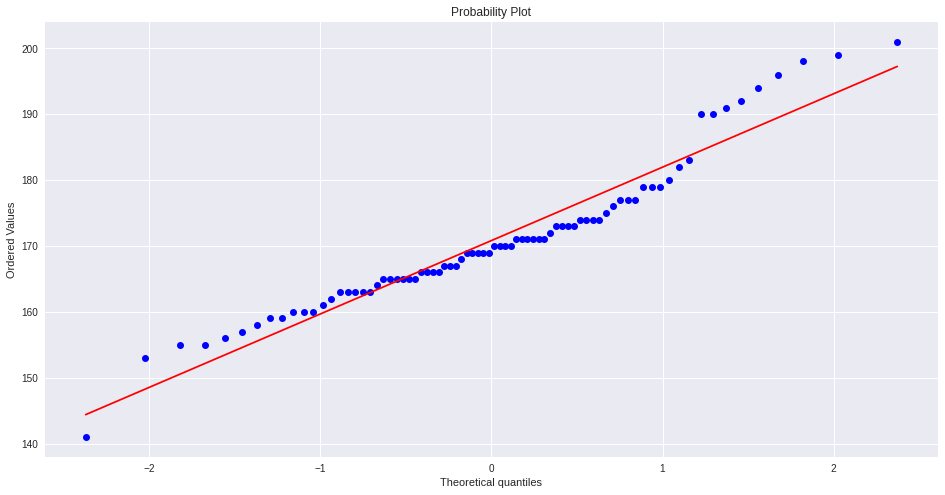

In [15]:
stats.probplot(data_frame['Height'], plot= plt, dist="norm")
plt.show()

Na wykresie qqplot dla kolumny zawirającej dane dot. wzrostu widzimy, że część danych układa się wzdłuż czerwonej linii, a część się od niej oddala. To także może wskazywać na brak normalności rozkładu.<br>
Dla całkowitej pewności wykorzystam jeszcze tzw. metodę kciuka i sprawdzę wartości skośności, kurtozy, mediany i średniej.

In [18]:
stats.skew(data_frame['Height']), stats.kurtosis(data_frame['Height'])

(0.6882176548173298, 0.7856260168567233)

In [19]:
data_frame['Height'].mean(),data_frame['Height'].median()

(170.82051282051282, 169.5)

Na podstawie powyższych wyników możemy przyjąć, że dane pochodzą z rozkładu normalnego, gdyż spełniają one wszystkie 2 warunki "zasady kciuka": skośność jest z przedziału (-1,1), kurtoza jest z przedziału (-1,1) oraz mediana i średnia są blisko siebie.
Dlatego, żeby sprawdzić czy wzrost osób badanych jest taki sam jak wzrost Polaków wykorzystam test t studenta, który bada czy średnie dwóch grup znacznie się różnią. Ponownie przyjmniemy poziom istotnośći 0.05.

In [20]:
data1 = data_frame['Height']
data2 = [177.3, 164.6]
alpha = 0.05
stat, p = stats.ttest_ind(data1, data2)
if p > alpha:
    print('Wzrost osób badanych jest taki sam jak wzrost Polaków')
else:
    print('Wzrost badanych osób jest różny niż wzrost Polaków')
print('statystyka:', stat, 'p-value:', p)

Wzrost osób badanych jest taki sam jak wzrost Polaków
statystyka: -0.01607259114812538 p-value: 0.9872175209483999


Z przeprowadzonego testu wynika, że nie ma podstaw do odrzucenia hipotezy zerowej, która zakłada, że średni wzrost badanych jest taki sam jak średni wzrost Polaków.
## Zadanie 6b
W danych znajdują się dwie informacje - waga przed dietą i waga po diecie. Czy
można przyjąć, że stosowanie diet jest skuteczne?
I tutaj ponownie, aby przeprowadzić test i sprawdzić tezę czy diety są skuteczne zaczniemy od sprawdzenia z jakiego rozkładu pochodzą dane z kolumn zawierających informacje o wadze przed dietą oraz po diecie. Dlatego ponownie przeprwadzę testy Shapior-Wilka, sporządze wykresy i sprawdzę tzw. zasadę kciuka dla każdej z kolumn.
<br> Zacznijmy od testu Shapiro-Wilka

In [21]:
data = data_frame['pre.weight']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Prawdopodobnie jest to rozkład normalny")
else:
    print("Prawdopodobnie nie jest to rozkład normalny")
print('statystyka:', stat, 'p-value:', p)

Prawdopodobnie jest to rozkład normalny
statystyka: 0.9691721796989441 p-value: 0.055405594408512115


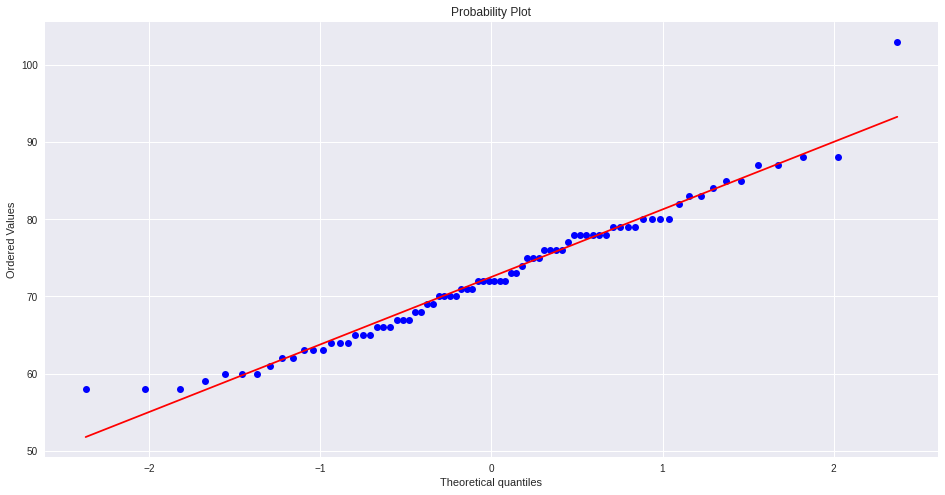

In [22]:
stats.probplot(data_frame['pre.weight'], plot= plt, dist="norm")
plt.show()

In [54]:
stats.skew(data_frame['pre.weight']), stats.kurtosis(data_frame['pre.weight'])

(0.5024639581928805, 0.4796236428282734)

In [23]:
data_frame['pre.weight'].mean(), data_frame['pre.weight'].median()

(72.52564102564102, 72.0)

Test Shapiro-Wilk, wykres qqplot wykazują, że rozkład danych wagi przed dietą jest normalny. Potwierdza to też zasada kciuka kurtoza i skośność jest z przedziału (-1, 1) a średnia i mediana jest blisko siebie.

In [24]:
data = data_frame['weight6weeks']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Prawdopodobnie jest to rozkład normalny")
else:
    print("Prawdopodobnie nie jest to rozkład normalny")
print('statystyka:', stat, 'p-value:', p)

Prawdopodobnie nie jest to rozkład normalny
statystyka: 0.9579498171806335 p-value: 0.011488787829875946


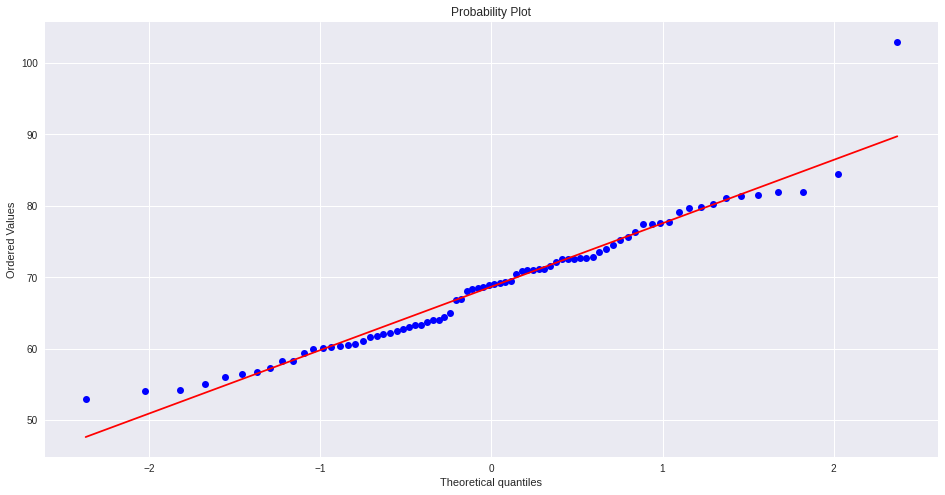

In [57]:
stats.probplot(data_frame['weight6weeks'], plot= plt, dist="norm")
plt.show()

In [27]:
stats.skew(data_frame['weight6weeks']), stats.kurtosis(data_frame['weight6weeks'])

(0.6601099761662811, 1.2265134589638853)

In [25]:
data_frame['weight6weeks'].mean(), data_frame['weight6weeks'].median()

(68.6807692307692, 68.95)

Jeśli chodzi o dane w kolumnie dotyczącej wagi po 6 tygodniach, tutaj zarówno test Shapiro-Wilka, wykres qqplot i zasada kciuka wskazują, że nie możemy przyjąć, że rozkład tych danych jest normalny. Dlatego aby potwierdzić tezę, że dieta jest skuteczna nie możemy wykorzystać testu t studenta dla zmiennych zależnych, a jego parametryczny odpowiednik, czyli test Wilcoxona dla par obserwacji. ponownie przyjmiemy poziom istotności 0.05 i postawimy następujące tezy:<br>
Hipoteza zerowa: Średnie w badanych grupach są sobie równe
<br>Hipoteza altenratywna: Średnie w badanych grupach są różne.

In [53]:
data1 = data_frame['pre.weight']
data2 = data_frame['weight6weeks']
alpha = 0.05
stat, p = stats.wilcoxon(data1, data2)
if p > alpha:
    print ('Średnie w badanych grupach są sobie równe')
else:
    print('Średnie w badanych grupach są różne.')
print('statystyka:', stat, 'p-value:', p)

Średnie w badanych grupach są różne.
statystyka: 33.5 p-value: 1.345573261261036e-13


Wynik testu pozwolił nam odrzucić tezę, ze średnie w obu grupach są równe, a więc możemy przyjąć, że stosowanie diet jest skuteczne. Potwierdza to też moje wcześniejsze wnioski założone w części dot. "Skuteczności diet".

In [54]:
data1 = data_frame['pre.weight']
data2 = data_frame['weight6weeks']
stat, p = ttest_rel(data1, data2)
alpha = 0.05
if p > alpha:
    print ('Średnie w badanych grupach są sobie równe')
else:
    print('Średnie w badanych grupach są różne.')
print('statystyka:', stat, 'p-value:', p)

Średnie w badanych grupach są różne.
statystyka: 13.308753851748712 p-value: 1.1722360462415227e-21
